<a href="https://colab.research.google.com/github/msa1997/ads-2023/blob/main/ADS_HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data from Kaggle

### We load the dataset directly from Kaggle.

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! echo "{\"username\":\"mohammadaliysz\",\"key\":\"e8f68a5df34c6dc24642db4faf2c79c5\"}" > kaggle.json
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d colearninglounge/predicting-pulsar-starintermediate

  0% 0.00/790k [00:00<?, ?B/s]
100% 790k/790k [00:00<00:00, 126MB/s]


In [ ]:
!unzip predicting-pulsar-starintermediate.zip

Archive:  predicting-pulsar-starintermediate.zip
  inflating: pulsar_data_test.csv    
  inflating: pulsar_data_train.csv   


# Library

In [ ]:
# Command to clear block output
from IPython.display import clear_output

import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split
sns.set(style="darkgrid")

# Dataset

**Predicting a Pulsar Star**

The journey of a star after its death is as interesting as when it's alive. When a star dies, it leads to a supernova explosion, leaving the core behind which goes to live on for several years, one of such cores is the Pulsar Star.

Pulsars are spherical, compact objects that are about the size of a large city but contain more mass than the sun. From Earth, pulsars often look like flickering stars. On and off, on and off, they seem to blink with a regular rhythm. But the light from pulsars does not actually flicker or pulse, as these objects are not actually stars! It is actually the radioactive waves emitted from these highly magnetic objects which get captured by our telescopes when it falls on it.

One way to think of a pulsar is like a lighthouse. At night, a lighthouse emits a beam of light that sweeps across the sky. Even though the light is constantly shining, you only see the beam when it is pointing directly in your direction.

Discovered in 1967, Pulsars are fantastic cosmic tools for scientists to study a wide range of phenomena. Scientists watch for changes in a pulsar's blinking that could indicate something happening in the space nearby which helps in studying extreme states of matter and search for planets beyond Earth's solar system. Thanks to the exquisite timing of the pulsars pulses, scientists have made some of the most accurate distance measurements of cosmic objects. Pulsars have also been used to test aspects of Albert Einstein's theory of general relativity, such as the universal force of gravity. The possibilities are endless.


**Machin Learning Approch in Astronomy**

But till date only over 2,000 pulsars have been detected. With millions of random celestial readings being captured, it becomes extremely challenging to correctly identify true pulsars. This is where Data Science and Machine learning comes into picture. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. With the data available to us, it is our job to build various classification models and see which can most correctly differentiate pulsars from non pulsars. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.


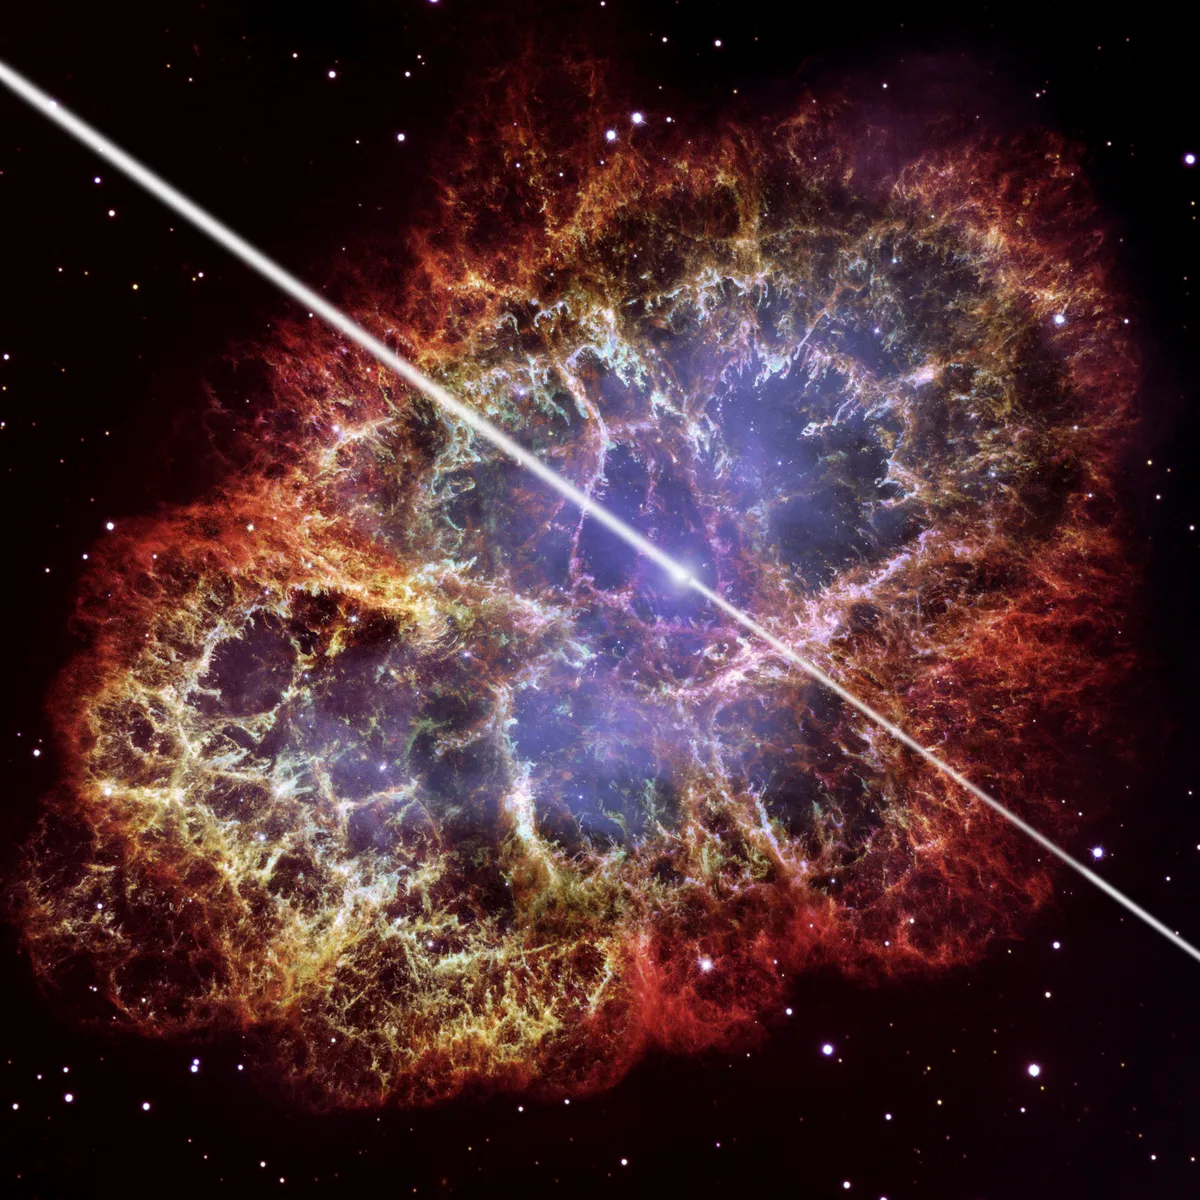

**Attribute Information**

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

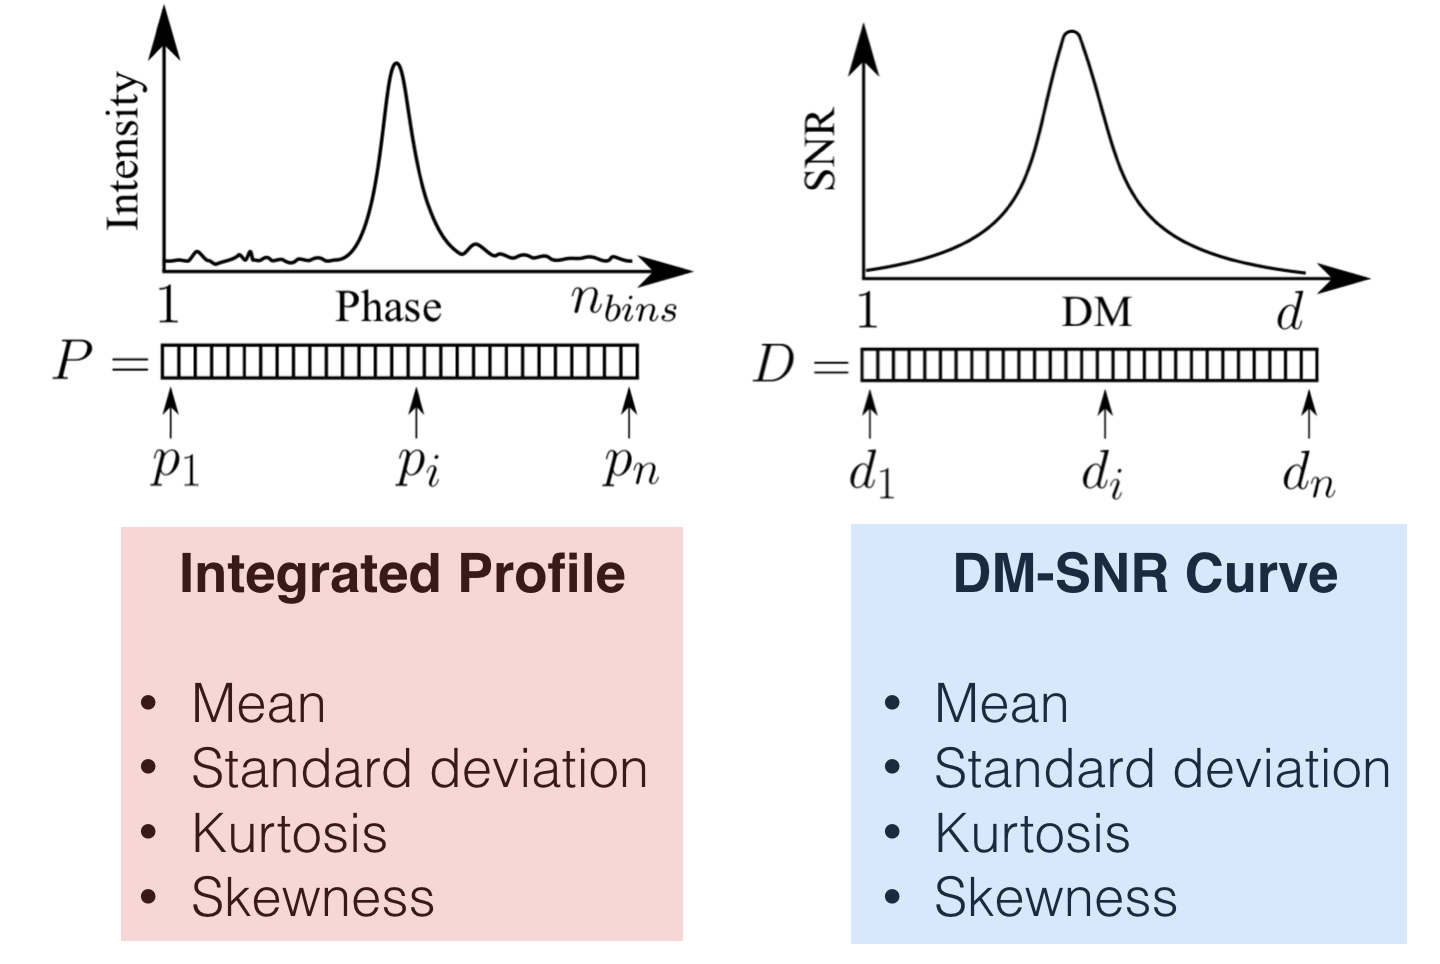

In [ ]:
from IPython.display import Image, display
gif_url = 'https://www.einstein-online.info/wp-content/uploads/Einstein_fuer_Einsteiger_Schwarze_Loecher_und_Co_Neutronenstern_Pulsar_%C2%A9_Daniela_Leitner_Markus_Poessel_Einstein-Online.gif'
display(Image(url=gif_url))

#### import dataset as a data frame

In [ ]:
train_data = pd.read_csv('pulsar_data_train.csv')

print(train_data.shape)

(12528, 9)


## A quick look at the dataset

In [ ]:
train_data.head()

Mean of the integrated profile  \
0                       121.156250   
1                        76.968750   
2                       130.585938   
3                       156.398438   
4                        84.804688   

    Standard deviation of the integrated profile  \
0                                      48.372971   
1                                      36.175557   
2                                      53.229534   
3                                      48.865942   
4                                      36.117659   

    Excess kurtosis of the integrated profile  \
0                                    0.375485   
1                                    0.712898   
2                                    0.133408   
3                                   -0.215989   
4                                    0.825013   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.013165                   3.168896   
1                             3.388719                   2.399666   
2                            -0.297242                   2.743311   
3                            -0.171294                  17.471572   
4                             3.274125                   2.790134   

    Standard deviation of the DM-SNR curve  \
0                                18.399367   
1                                17.570997   
2                                22.362553   
3                                      NaN   
4                                20.618009   

    Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                              7.449874                      65.159298   
1                              9.414652                     102.722975   
2                              8.508364                      74.031324   
3                              2.958066                       7.197842   
4                              8.405008                      76.291128   

   target_class  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [ ]:
# train_data.info
train_data.describe()

Mean of the integrated profile  \
count                     12528.000000   
mean                        111.041841   
std                          25.672828   
min                           5.812500   
25%                         100.871094   
50%                         115.183594   
75%                         127.109375   
max                         189.734375   

        Standard deviation of the integrated profile  \
count                                   12528.000000   
mean                                       46.521437   
std                                         6.801077   
min                                        24.772042   
25%                                        42.362222   
50%                                        46.931022   
75%                                        50.979103   
max                                        91.808628   

        Excess kurtosis of the integrated profile  \
count                                10793.000000   
mean                                     0.478548   
std                                      1.064708   
min                                     -1.738021   
25%                                      0.024652   
50%                                      0.223678   
75%                                      0.473125   
max                                      8.069522   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                         12528.000000               12528.000000   
mean                              1.778431                  12.674758   
std                               6.208450                  29.613230   
min                              -1.791886                   0.213211   
25%                              -0.188142                   1.910535   
50%                               0.203317                   2.792642   
75%                               0.932374                   5.413253   
max                              68.101622                 222.421405   

        Standard deviation of the DM-SNR curve  \
count                             11350.000000   
mean                                 26.351318   
std                                  19.610842   
min                                   7.370432   
25%                                  14.404353   
50%                                  18.412402   
75%                                  28.337418   
max                                 110.642211   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                          12528.000000                   11903.000000   
mean                               8.333489                     105.525779   
std                                4.535783                     107.399585   
min                               -3.139270                      -1.976976   
25%                                5.803063                      35.199899   
50%                                8.451097                      83.126301   
75%                               10.727927                     139.997850   
max                               34.539844                    1191.000837   

       target_class  
count  12528.000000  
mean       0.092034  
std        0.289085  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


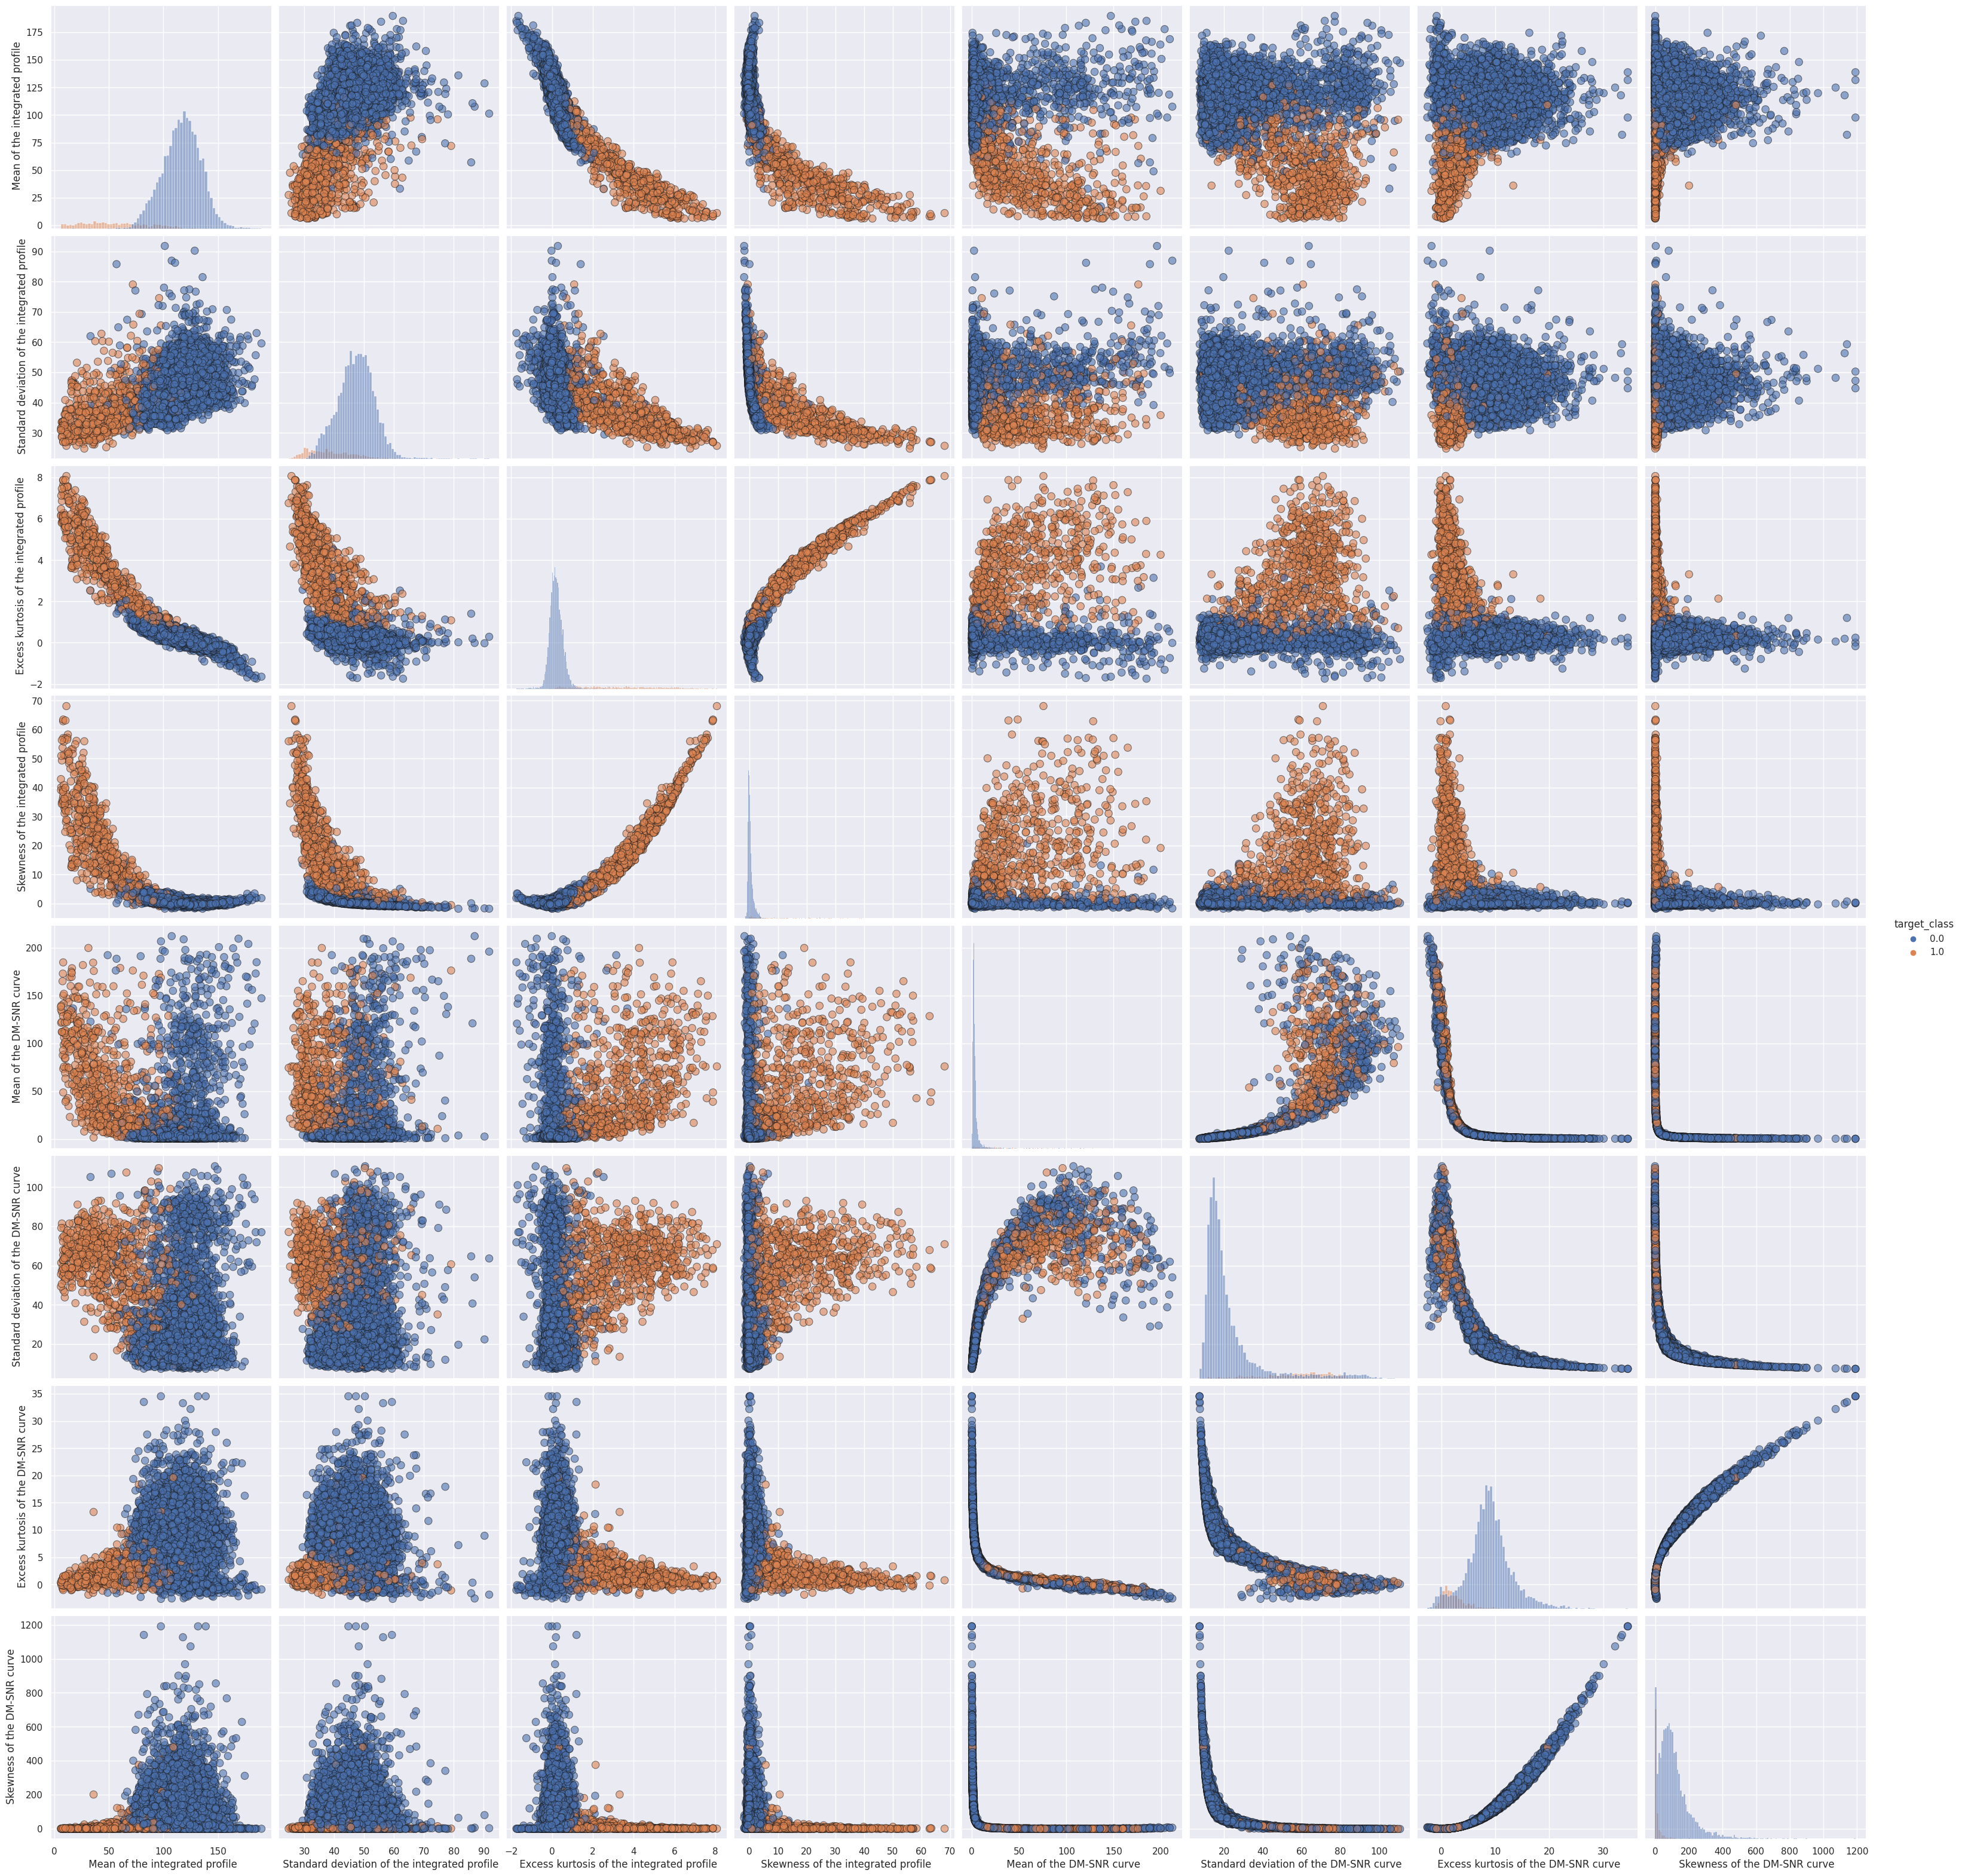

In [ ]:
sns.pairplot(train_data, diag_kind = 'hist',hue='target_class', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4)

# Data Cleaning

#### Checking Nulls

In [ ]:
# Check for missing values in both datasets
missing_values_train = train_data.isnull().sum()

print(missing_values_train)

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64


In [ ]:
train_data.dropna(inplace=True)

#### We impute **Null** values by the **Mean**.

In [ ]:
# Impute missing values with the mean of each column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
train_data_imputed = imputer.fit_transform(train_data.drop(columns=['target_class']))
# test_data_imputed = imputer.transform(test_data.drop(columns=['target_class']))

In [ ]:
# Convert the imputed arrays back to DataFrames
train_data_imputed_df = pd.DataFrame(train_data_imputed, columns=train_data.drop(columns=['target_class']).columns, index=train_data.index)
# test_data_imputed_df = pd.DataFrame(test_data_imputed, columns=test_data.drop(columns=['target_class']).columns, index=test_data.index)

In [ ]:
#spliting dataset into train and test dataset (we keep 30% of data for test)
X_train, X_test, y_train, y_test = train_test_split(train_data_imputed_df, train_data['target_class'] ,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(6491, 8)
(2782, 8)


In [ ]:
train_data['target_class'].value_counts()

0.0    8423
1.0     850
Name: target_class, dtype: int64

## Normalization/Standardization of Data

In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(X_train)

# Logistic Regression for Classification

### Attention: since splitting data to test and train is done randomly all the achieved results might be changed by running again.

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(penalty='none',max_iter=100)
model_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

In [ ]:
predictions = model_LR.predict(X_test) # Predicting the class of test data

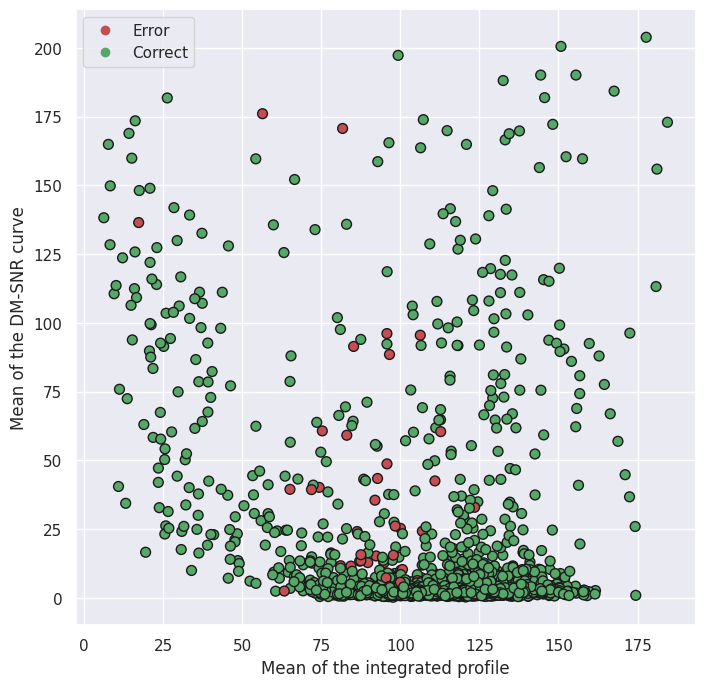

In [ ]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(8, 8))
colours = ListedColormap(['r','g'])
scatter = plt.scatter(X_test[' Mean of the integrated profile'].values,X_test[' Mean of the DM-SNR curve'].values, marker="o", c=predictions==y_test.values.reshape(-1), s=50, cmap=colours, edgecolor="k")
plt.xlabel('Mean of the integrated profile')
plt.ylabel('Mean of the DM-SNR curve')
plt.legend(handles=scatter.legend_elements()[0], labels=['Error','Correct'])

plt.show()

#### Logistic Regression for Classification (with F1-score above 0.75)

In [ ]:
from sklearn.metrics import f1_score
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.93


The Logistic Regression model achieved an average F1-score of approximately 0.93 on the test dataset, which means most of the data have been predicted correctly. This is above the required threshold of 0.75, scoring 5 points for this part of the task.

### Importance of each column from the Logistic Regression's point of view.

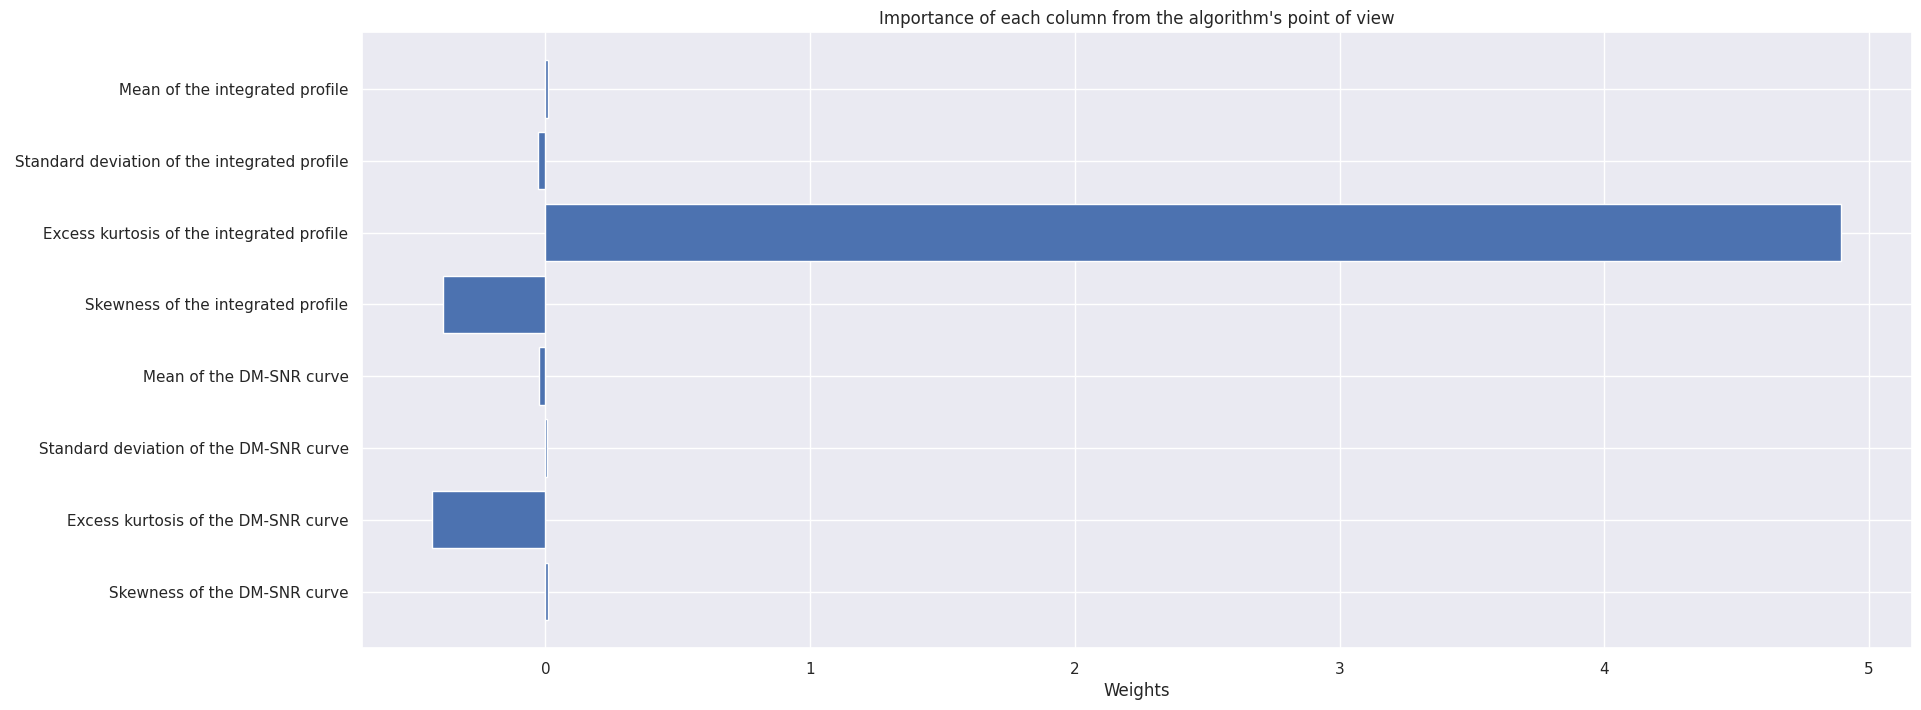

In [ ]:
weights_linear = model_LR.coef_[0]
fig, ax = plt.subplots(figsize=(20,8))
y_pos = np.arange(0,len(weights_linear),1)
labels = list(train_data_imputed_df.columns)

hbars = ax.barh(y_pos, weights_linear, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Weights')
ax.set_title("Importance of each column from the algorithm's point of view")
plt.show()

#### **Excess kurtosis of the integrated profile** seems to be a very important feature. so we plot it against the target variable.

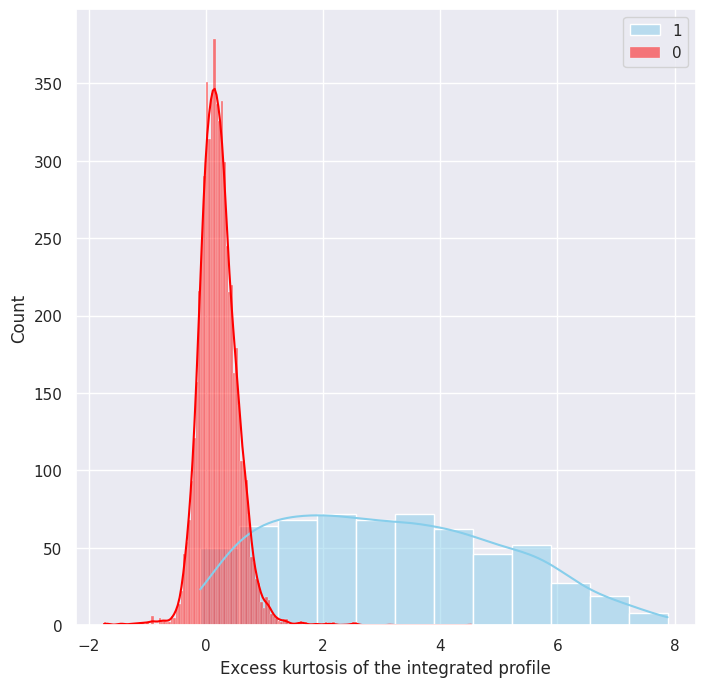

In [ ]:
plt.figure(figsize=(8, 8))
colours = ListedColormap(['r','g'])
scatter = sns.histplot(X_train[' Excess kurtosis of the integrated profile'][y_train.values.ravel() ==1],color="skyblue",label="1", kde=True)
scatter = sns.histplot(X_train[' Excess kurtosis of the integrated profile'][y_train.values.ravel() ==0],color="red", label="0", kde=True)

plt.xlabel('Excess kurtosis of the integrated profile')

plt.legend()
plt.show()

# SVM (Simple Linear)

In [ ]:
# load and train an SVM model
from sklearn.svm import SVC
model1 = SVC(C=0.1,kernel='linear',max_iter=10000)    # C > 0 means we are having some l2-regularization  penalty
model1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=0.1, kernel='linear', max_iter=10000)

In [ ]:
predictions1 = model1.predict(X_test)

#### SVM (with F1-score above 0.8)

In [ ]:
from sklearn.metrics import f1_score
print('Macro F1-score is %.2f' %f1_score(y_test, predictions1, average='macro'))

Macro F1-score is 0.90


# Kernel SVM
In the kernel version of SVM instead of the raw features, the extracted features by the kernel are used.



In [ ]:
model2 = SVC(C=2,kernel='rbf',max_iter=5000)    # C > 0 means we are having some l2-regularization  penalty
model2.fit(X_train, y_train)

SVC(C=2, max_iter=5000)

In [ ]:
predictions2 = model2.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
print('Macro F1-score is %.2f' %f1_score(y_test, predictions2, average='macro'))

# KNN

We set the **weights**='distance' to cluster points based on the **euclidian** distance between them. For this step, we go with default value for number of neighbors, which is 5, and at the next step, we try to tune this number to obtian the best performance.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(weights='distance')
model3.fit(X_train, y_train)

In [ ]:
predictions3 = model3.predict(X_test)

In [ ]:
print('Macro F1-score on Test set is %.2f' %f1_score(y_test, predictions3, average='macro'))

### Tune the number of neighbors
What is the best number?

In [ ]:
scores = []
neighbors_list = range(2,10,1)
scores = []
scores_train = []
for n in neighbors_list:

    # Create the model
    model = KNeighborsClassifier(n_neighbors=n,weights='distance')
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(neighbors_list,scores,lw=3,  marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(neighbors_list,scores_train,lw=3,color='orange', marker='o', markersize=10)
plt.xlabel('Number of neighbors')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


The best result belongs to **6** neighbors that achieved an f1-score of 0.92.

#### KNN (with F1-score above 0.8)

In [ ]:
model4 = KNeighborsClassifier(weights='distance', n_neighbors = 6)
model4.fit(X_train, y_train)
predictions4 = model4.predict(X_test)
print('Macro F1-score on Test set is %.2f in KNN with 6 neighbors' %f1_score(y_test, predictions4, average='macro'))

NameError: ignored

# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Although the model already achieves good results, we can improve the model even more by using `entropy` instead of `gini` as the criterion and setting the proper value for the **min samples leaf**.

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=10)
model.fit(X_train, y_train)

#### Decision Trees (with F1-score above 0.8)

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Now we want to tune the **max-depth** to improve the performance. Note that too low and too high max-depth both result in low performance, too low max-depth prevents the model from learning properly, and too high max-depth causes overfitting, as you can see in the next plot.

In [ ]:
# tuning the max-depth
scores = []
depths_list = range(1, 10 , 1)
scores = []
scores_train = []
for d in depths_list:

    # Create the model
    model = DecisionTreeClassifier( max_depth=d)
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(depths_list,scores,lw=3,marker='o', markersize=10)
plt.plot(depths_list,scores_train,lw=3,color='orange',marker='o', markersize=10)
plt.xlabel('Max Depth of the Tree')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


For low values for the max-depth, we have a model with a low f1-score in both the train and test data. On the other hand, for high max-depth, the training score increase continuously, but the test score decreases, which indicates our model is overfitted to train data as result can not perform well on unseen test data and has high generalization error. Based on the result best max-depth is 3.

In [ ]:
model = DecisionTreeClassifier( max_depth=3)
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (35,17))
tree.plot_tree(model,feature_names = train_data_imputed_df.columns, filled = True,fontsize=12)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,max_depth=5)
model.fit(X_train, y_train)

#### Random Forests (with F1-score above 0.85)

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

### So we already have achieved the best result using the Random Forest.

# Diabetes Dataset Challenge (40 Bonus points)

#### 40 Bonus points: On the dataset we used in the lab session (for detecting diabetes), achieve an F1 score above 0.9 (on the test set) using whatever classification method you like (test set should be 20% of the whole data). All scores are measured on test set, which should be 20% of the whole dataset

## Loading data from Kaggle

In [ ]:
!kaggle datasets download -d mathchi/diabetes-data-set

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 26.3MB/s]


In [ ]:
!unzip diabetes-data-set.zip

Archive:  diabetes-data-set.zip
  inflating: diabetes.csv            


In [ ]:
df = pd.read_csv('diabetes.csv')

## Preprocessing

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# The missing values will be filled with the median values of each variable.

def median_target(var):

    temp = df[df[var].notnull()]

    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()

    return temp

In [ ]:
columns = df.columns

columns = columns.drop("Outcome")

In [ ]:
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
median_target('Glucose')

Outcome  Glucose
0        0    107.0
1        1    140.0

In [ ]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.

columns = df.columns

columns = columns.drop("Outcome")

for col in columns:

    df.loc[(df['Outcome'] == 0 ) & (df[col].isnull()), col] = median_target(col)[col][0]
    df.loc[(df['Outcome'] == 1 ) & (df[col].isnull()), col] = median_target(col)[col][1]

In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df["Pregnancies"].isnull()), "Pregnancies"]


Series([], Name: Pregnancies, dtype: int64)

In [ ]:
df[(df['Outcome'] == 0 ) & (df["BloodPressure"].isnull())]


Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

# Feature Engineering

In [ ]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

df["NewBMI"] = NewBMI

df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]

df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome      NewBMI  
0                     0.627   50        1   Obesity 1  
1                     0.351   31        0  Overweight  
2                     0.672   32        1      Normal  
3                     0.167   21        0  Overweight  
4                     2.288   33        1   Obesity 3

In [ ]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome      NewBMI  
0                     0.627   50        1   Obesity 1  
1                     0.351   31        0  Overweight  
2                     0.672   32        1      Normal  
3                     0.167   21        0  Overweight  
4                     2.288   33        1   Obesity 3

In [ ]:
df["NewInsulinScore"] = df.apply(set_insulin, axis=1)

In [ ]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")

df["NewGlucose"] = NewGlucose

df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]

df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]

df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]

df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

# One-Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                     0.627   50        1                 1                 0   
1                     0.351   31        0                 0                 0   
2                     0.672   32        1                 0                 0   
3                     0.167   21        0                 0                 0   
4                     2.288   33        1                 0                 0   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0                 0                  0                   0   
1                 0                  1                   0   
2                 0                  0                   0   
3                 0                  1                   0   
4                 1                  0                   0   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                       0               0                  0   
1                       1               0                  1   
2                       0               0                  0   
3                       1               0                  1   
4                       0               0                  0   

   NewGlucose_Overweight  NewGlucose_Secret  
0                      0                  1  
1                      0                  0  
2                      0                  1  
3                      0                  0  
4                      0                  1

In [ ]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

# Feature Standartization

In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [ ]:
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [ ]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0          0.6  0.765432          0.000       1.000000  1.000000  0.170330   
1         -0.4 -0.790123         -0.375       0.142857  0.000000 -0.598901   
2          1.0  1.629630         -0.500       0.571429  1.000000 -0.961538   
3         -0.4 -0.691358         -0.375      -0.714286 -0.126866 -0.434066   
4         -0.6  0.493827         -2.000       1.000000  0.977612  1.214286   

   DiabetesPedigreeFunction       Age  
0                  0.665359  1.235294  
1                 -0.056209  0.117647  
2                  0.783007  0.176471  
3                 -0.537255 -0.470588  
4                  5.007843  0.235294

In [ ]:
X = pd.concat([X, categorical_df], axis = 1)

In [ ]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0          0.6  0.765432          0.000       1.000000  1.000000  0.170330   
1         -0.4 -0.790123         -0.375       0.142857  0.000000 -0.598901   
2          1.0  1.629630         -0.500       0.571429  1.000000 -0.961538   
3         -0.4 -0.691358         -0.375      -0.714286 -0.126866 -0.434066   
4         -0.6  0.493827         -2.000       1.000000  0.977612  1.214286   

   DiabetesPedigreeFunction       Age  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                  0.665359  1.235294                 1                 0   
1                 -0.056209  0.117647                 0                 0   
2                  0.783007  0.176471                 0                 0   
3                 -0.537255 -0.470588                 0                 0   
4                  5.007843  0.235294                 0                 0   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0                 0                  0                   0   
1                 0                  1                   0   
2                 0                  0                   0   
3                 0                  1                   0   
4                 1                  0                   0   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                       0               0                  0   
1                       1               0                  1   
2                       0               0                  0   
3                       1               0                  1   
4                       0               0                  0   

   NewGlucose_Overweight  NewGlucose_Secret  
0                      0                  1  
1                      0                  0  
2                      0                  1  
3                      0                  0  
4                      0                  1

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

LR F1-Score: 0.7709
KNN F1-Score: 0.7945
CART F1-Score: 0.7357
RF F1-Score: 0.8273
SVM F1-Score: 0.7985
Best Model: RF with F1-Score: 0.8273
LR: 0.901010 (0.831111)
KNN: 0.899309 (0.820550)
CART: 0.869640 (0.823144)
RF: 0.929293 (0.864631)
SVM: 0.899309 (0.830675)


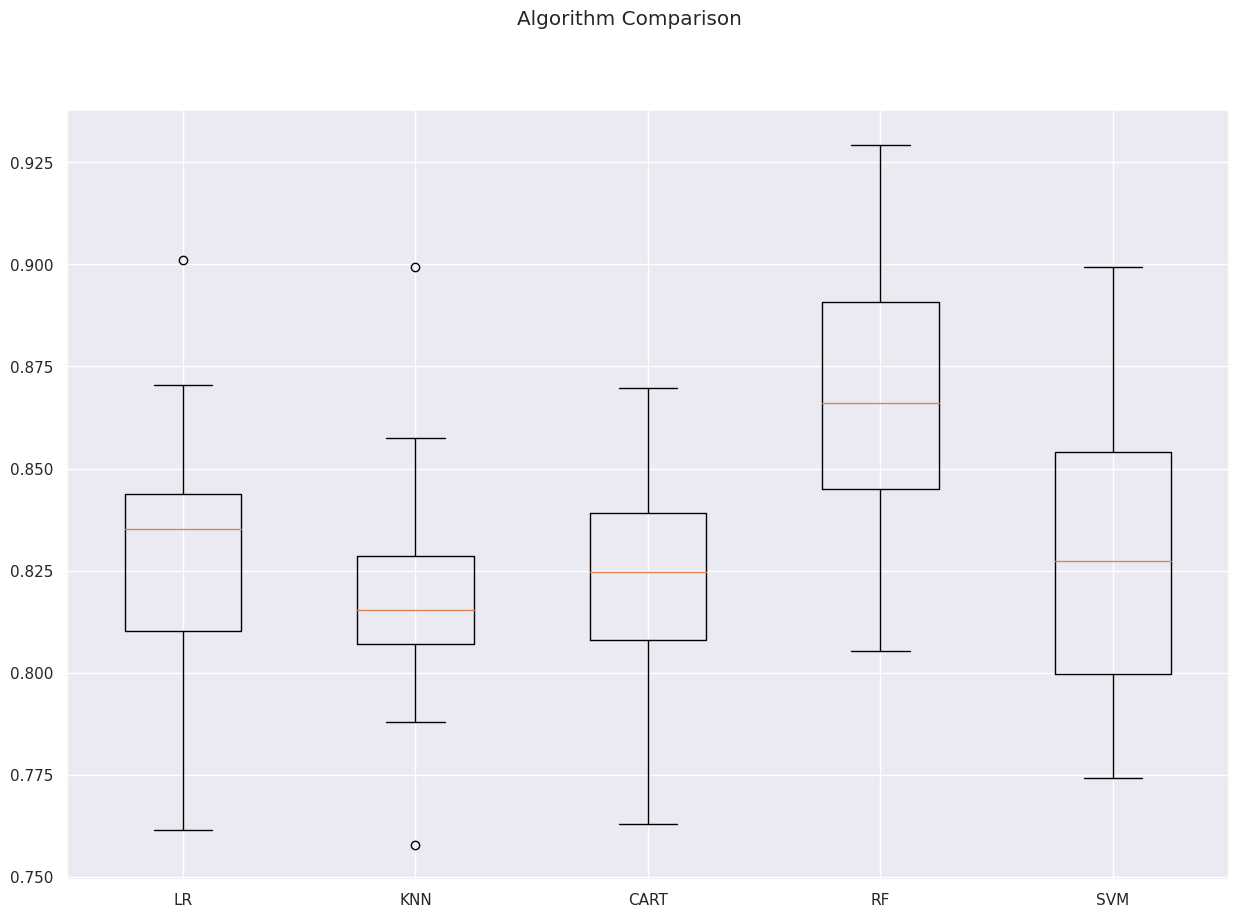

In [ ]:
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore', message='[LightGBM] [Warning]*')

# Assuming df is your features and y is your labels

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# List of models
models = []
models.append(('LR', LogisticRegression(random_state=12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=12345)))
models.append(('RF', RandomForestClassifier(random_state=12345)))
models.append(('SVM', SVC(gamma='auto', random_state=12345)))
# models.append(('XGB', XGBClassifier(random_state=12345)))
# models.append(("LightGBM", LGBMClassifier(random_state=12345)))

# Dictionary to store f1 scores
f1_scores = {}

# Evaluate each model
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate the F1 score
    f1 = f1_score(y_test, predictions, average='macro')  # Change 'macro' to 'micro' or 'weighted' if needed
    f1_scores[name] = f1

    print(f"{name} F1-Score: {f1:.4f}")

# Find the best performing model
best_model = max(f1_scores, key=f1_scores.get)
print(f"Best Model: {best_model} with F1-Score: {f1_scores[best_model]:.4f}")
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
# models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
# models.append(("LightGBM", LGBMClassifier(force_col_wise=True)))

# evaluate each model in turn
results = []
names = []

for name, model in models:

        kfold = KFold(shuffle=True,n_splits = 10, random_state = 12345)

        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "f1_macro")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.max(), cv_results.mean())
        print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

As we can see from the box plots the **RandomForest** model gets the best f1-score in crossvalidation.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In the following cell we will do these things:

Cross-Validation: The cross_val_score function performs cross-validation on the x_train and y_train datasets. It will train the model on different subsets of x_train and y_train and calculate the F1 score for each fold. The results are stored in cv_results.

Model Prediction: After cross-validation, we are fitting the model again on the entire x_train and y_train dataset and then using model.predict to get predictions for x_test. This is followed by calculating the F1 score for these predictions against y_test.

In [ ]:
models = []
models.append(('Random Forest', RandomForestClassifier(random_state = 42)))

results = []
names = []

for name, model in models:

        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(model, X_train, y_train, cv = 20, scoring= "f1")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        results.append(cv_results)
        names.append(name)
        print("model:",name)
        print("F1-Score: ", f1)


NameError: ignored

### We get F1-Score above 90% with RandomForestClassifier!

# Conceptual Question (10 Points)
### Explain 3 techniques to regualarize the training process for decision trees.

Regularization is a crucial step in ensuring that decision trees do not overfit the training data and are able to perform well on new, unseen data. Each of these techniques offers a different approach to simplifying the model and enhancing its generalization abilities.
Here are three common regularization techniques used in the training process of decision trees:


1.   **Pruning:**


*   Description: Pruning is the process of removing parts of the tree that provide little power to classify instances. This can be done by cutting off branches of the tree. There are two types of pruning:


  *   Pre-Pruning (Early Stopping): This involves stopping the tree before it has completed classifying the training set. For example, setting a maximum depth of the tree or a minimum number of samples required to make a further split.

*   Post-Pruning: This involves first growing a complete tree, and then removing nodes from the bottom-up if they result in improved performance on a validation set.

*   Benefits: Pruning reduces the complexity of the final model, thereby reducing the risk of overfitting and improving the model's generalization abilities.



2.   **Setting Constraints on Tree Size:**

*   Description: This technique involves setting various constraints on the size of the decision tree during its construction. These constraints can include:



> Maximum Depth: Limiting the maximum depth of the tree.

> Minimum Samples for a Split: Setting the minimum number of samples that are required for a node to be split.

> Minimum Samples per Leaf: Specifying the minimum number of samples that must be present in a leaf node.


*   Benefits: These constraints help in controlling the growth of the tree and prevent it from becoming overly complex. A simpler tree is often more robust and less prone to overfitting.


3.   **Feature Selection and Feature Constraints:**

*   Description: Feature selection involves choosing a subset of the most relevant features for training the decision tree. This can be done using techniques like:

> Information Gain

> Gini Impurity

*   Benefits: By limiting the number of features or using only the most relevant features, the tree complexity can be reduced. This not only prevents overfitting but also improves the interpretability of the model.
